## Curso especialización Inteligencia Artificial y Big Data
## Ejercicio 1: Reto inicial

Objetivo: entrenar una red neuronal para reconocer dígitos manuscritos.

Datos de partida: utilizaremos el [dataset MNIST, recopilado y compartido por Yann LeCun](http://yann.lecun.com/exdb/mnist/) y que podemos cargar desde la propia librería de Keras.
# Nueva sección

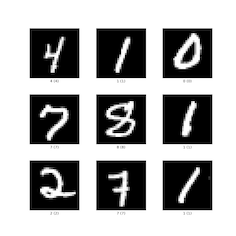


### 1. Carga el dataset MNIST de Keras

Empezamos por importar el dataset desde la librería Keras y cargarlo con el método load_data()

```
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
```



In [ ]:
# Escribe aquí el código de importación
from keras.datasets import mnist


(train_images, train_labels), (test_images, test_labels) =mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


### 2. Construcción del modelo

Importamos los módulos para crear un modelo y para utilizar la arquitectura por capas típica del deep learning. 
Creamos el objeto network, que será nuestro modelo de la clase Sequential(), que es la que admite varias capas de profundidad.
Después, con el método add, iremos apilando capas, en este caso, de la clase Dense, que los las de la arquitectura típica de red neuronal (densely connected). Una primera capa tendrá el atributo de 512 neuronas y función de activación "relu" y la siguiente capa tendrá 10 neuronas y función de activación "softmax"



```
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
network.add(layers.Dense(10, activation = 'softmax'))
```



In [ ]:
# Escribe aquí el código

from keras import models
from keras import layers 

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
network.add(layers.Dense(10, activation = 'softmax'))


### 3. Fijar los parámetros del entrenamiento

Con el método compile(), indicamos el optimizador a utilizar, el tipo de función de coste (la relacionada con el error entre el resultado del modelo y las etiquetas dadas) y la métrica que queremos ir monitorizando durante el entrenamiento, que será 'accuracy' (precisión o casos correctamente clasificados).



```
network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
```



In [ ]:
# Escribe aquí el código

network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

### 4. Preparando las imágenes y las etiquetas

Antes de pasar al entrenamiento, necesitamos hacer algunos ajustes. 
Por un lado, tenemos que cambiar las dimensiones del array que entrará en el modelo, pasando a forma vector. Por otro, adimensionalizamos los valores de instensidad de los pixeles de las imágenes, para que estén entre 0 y 1 (antes estaban entre 0 y 255) y los convertimos en tipo float32.



```
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255
```
Tambien va a ser necesario pasar las etiquetas a tipo "categórico"



```
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
```




In [ ]:
# Escribe aquí el código

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255



In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### 5. Entrenamiento del modelo

Llegamos al paso culminante: el entrenamiento del modelo. Se hace utilizando el método fit(), con los parámetros imprescindibles del conjunto de datos de entrada, el número de iteraciones de cálculo, y el tamaño del lote de datos a utilizar en cada iteración.



```
network.fit(train_images, train_labels, epochs = 5, batch_size= 128)
```



In [ ]:
# Escribe aquí el código

network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0284 - accuracy: 0.9915
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0217 - accuracy: 0.9935
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0171 - accuracy: 0.9952
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0128 - accuracy: 0.9965
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0099 - accuracy: 0.9973


### 6. Evaluación del modelo entrenado

Ahora probamos el modelo entrenado utilizando el método evaluate() y los datos de test.



```
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test_acc: ", test_acc)
```



In [ ]:
# Escribe aquí el código:

test_loss,test_acc = network.evaluate(test_images, test_labels)
print("test_acc: ", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0714 - accuracy: 0.9827
test_acc:  0.982699990272522
